In [7]:
import os
import sys
import scipy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
from scipy.special import expit

import import_ipynb
from model import Model

In [8]:
FIG_FOLDER = 'fig'
SOURCE_FOLDER = os.path.join('data', 'source')
BACKUP_FOLDER = os.path.join('data', 'backup')
print(f"The source folder is: {os.path.abspath(SOURCE_FOLDER)}")
print(f"The figure folder is: {os.path.abspath(FIG_FOLDER)}")
print(f"The backup folder is: {os.path.abspath(BACKUP_FOLDER)}")

# Create folders
for f in SOURCE_FOLDER, FIG_FOLDER, BACKUP_FOLDER:
    os.makedirs(f, exist_ok=True)

The source folder is: /Users/aureliennioche/Documents/PythonProjects/ProspecTonk/data/source
The figure folder is: /Users/aureliennioche/Documents/PythonProjects/ProspecTonk/fig
The backup folder is: /Users/aureliennioche/Documents/PythonProjects/ProspecTonk/data/backup


### Load the results

In [16]:
df_fit = pd.read_csv(os.path.join(BACKUP_FOLDER, f"df_fit_overall.csv"))
for c in ("date_begin", "date_end"):
    df_fit[c] = pd.to_datetime(df_fit[c])
df_fit.drop(df_fit.filter(regex="Unname"),axis=1, inplace=True)
df_fit

,distortion,precision,risk_aversion,date_begin,date_end,monkey,condition,n
0,0.200000,10.000000,0.990000,2020-06-25,2020-10-25,Ola,gain,837
1,0.259678,5.822507,-0.990000,2020-06-25,2020-10-25,Ola,loss,844
2,1.037537,3.411747,0.408641,2020-06-25,2020-10-25,Abr,gain,1873
3,0.643684,0.496632,-0.406756,2020-06-25,2020-10-25,Abr,loss,1874
4,1.500295,2.562927,-0.172520,2020-06-25,2020-10-25,Nem,gain,800
5,0.618009,0.304122,-0.437583,2020-06-25,2020-10-25,Nem,loss,803
6,1.258861,1.165837,-0.345788,2020-06-25,2020-10-25,Alv,gain,1825
7,0.776557,0.334887,-0.493689,2020-06-25,2020-10-25,Alv,loss,1824
8,0.200000,1.572916,0.990000,2020-06-25,2020-10-25,Ner,gain,465
9,1.766011,6.205341,0.534613,2020-06-25,2020-10-25,Ner,loss,462


In [17]:
df_elo = pd.read_csv(os.path.join(BACKUP_FOLDER, "df_elo.csv"), index_col=0)
df_elo.index = pd.to_datetime(df_elo.index)
df_elo

,nem,yak,ner,yoh,nen,wot,pac,las,anu,ola,...,olg,jea,pat,bar,ces,lad,ber,dor,eri,fic
date,,,,,,,,,,,,,,,,,,,,,
2016-10-25,1024,1009,1018,984,991,1010,991,982,991,1000,...,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000
2016-10-26,1032,1009,1018,1003,991,1010,982,964,991,999,...,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000
2016-10-27,1032,1009,1018,1003,991,1010,982,956,991,999,...,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000
2016-10-28,1041,1009,1018,1003,991,1010,982,956,991,999,...,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000
2016-10-29,1063,1009,1018,1011,991,1010,975,941,984,1008,...,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-10-21,938,1243,961,840,1018,1234,1379,713,1117,1287,...,933,760,841,1083,837,753,743,766,702,579
2020-10-22,970,1243,962,840,1018,1234,1347,716,1105,1296,...,935,755,841,1070,832,753,743,795,702,566
2020-10-23,971,1243,970,840,1018,1234,1347,735,1105,1296,...,920,751,841,1072,838,753,758,773,668,566


In [19]:
elo = []

for _, row in df_fit.iterrows():
        
    m = row.monkey
    begin = row.date_begin
    end = row.date_end
        
    df_elo_m = df_elo[m.lower()]
    df_elo_m = df_elo_m[(df_elo_m.index >= begin) & (df_elo_m.index <= end)]
    elo.append(np.mean(df_elo_m))
        

df_fit['elo'] = elo
df_fit

,distortion,precision,risk_aversion,date_begin,date_end,monkey,condition,n,elo
0,0.200000,10.000000,0.990000,2020-06-25,2020-10-25,Ola,gain,837,1364.308943
1,0.259678,5.822507,-0.990000,2020-06-25,2020-10-25,Ola,loss,844,1364.308943
2,1.037537,3.411747,0.408641,2020-06-25,2020-10-25,Abr,gain,1873,1239.707317
3,0.643684,0.496632,-0.406756,2020-06-25,2020-10-25,Abr,loss,1874,1239.707317
4,1.500295,2.562927,-0.172520,2020-06-25,2020-10-25,Nem,gain,800,928.788618
5,0.618009,0.304122,-0.437583,2020-06-25,2020-10-25,Nem,loss,803,928.788618
6,1.258861,1.165837,-0.345788,2020-06-25,2020-10-25,Alv,gain,1825,1243.382114
7,0.776557,0.334887,-0.493689,2020-06-25,2020-10-25,Alv,loss,1824,1243.382114
8,0.200000,1.572916,0.990000,2020-06-25,2020-10-25,Ner,gain,465,999.463415
9,1.766011,6.205341,0.534613,2020-06-25,2020-10-25,Ner,loss,462,999.463415


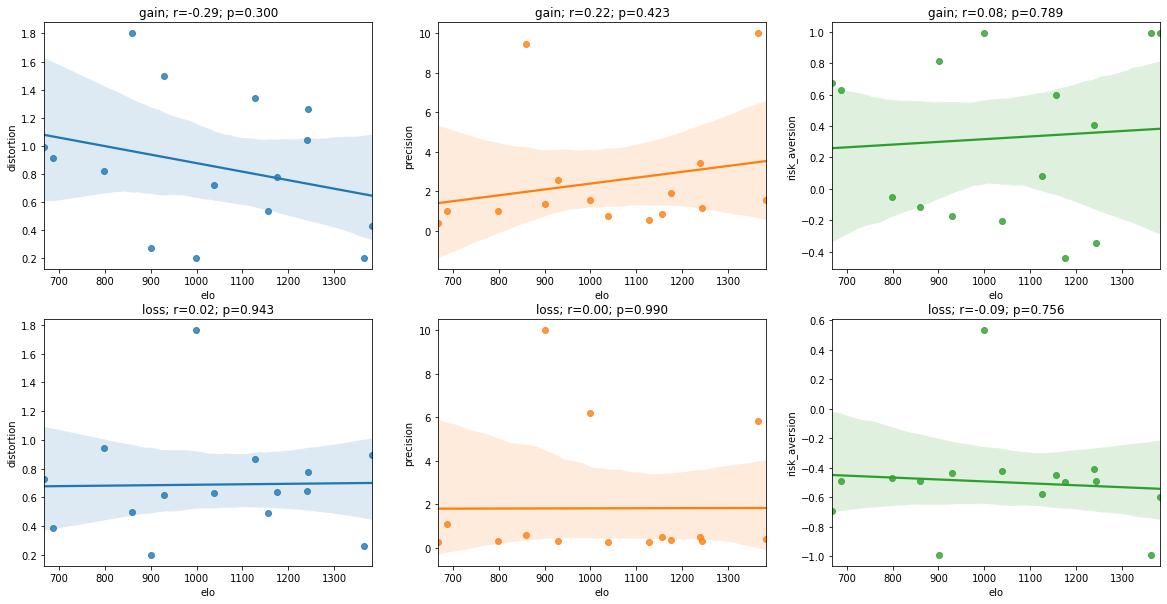

In [23]:
monkeys = df_fit.monkey.unique()
cond = df_fit.condition.unique()
n_param = len(Model.param_labels)

fig, axes = plt.subplots(figsize=(20, 10), nrows=2, ncols=3)

for i, cd in enumerate(cond):
    
    df = df_fit[df_fit.condition == cd]
    
    for j, pr in enumerate(Model.param_labels):
            
        r, p = scipy.stats.pearsonr(df.elo.values, df[pr].values)
           
        ax = axes[i, j]
        t = f"{cd}; r={r:.2f}; p={p:.3f}"
        ax.set_title(t)
            
        sns.regplot(x="elo", y=pr, data=df, color=f"C{j}", ax=ax)